# R для тервера и матстата

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Он распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)


In [109]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=6, repr.plot.height=3)

## 1. Какими бывают сходимости 

## 2. Сходимость по распределению

## 3. Cходимость по вероятности

Давайте поговорим о различных сходимостях, которые встречаются в теории вероятностей. Нам с вами довольно часто придется иметь дело в матстате и эконометрике дело с разными асимптотическими штуками. В связи с этим, хорошо было бы представлять себе как выглядят различные сходимости. 

Перед тем как говорить о вероятностных сходимостях, давайте вспомним определение обычной сходимости. Говорят, что последовательность неслучайных чисел $a_n$ сходится в числу $A$, если для любого сколь угодно малого числа $\varepsilon >0$ существует число $N(\varepsilon)$ токое, что $\forall n > N(\varepsilon)$ выполняется $\mid a_n - A \mid < \varepsilon$.

Перефразируем. Последовательность сходится к $A$, если мы можем выбрать какое-то маленькое положительное число после которого разница между пределом и каждым членом последовательности будет меньше этого числа. Давайте посмотрим на это чудо из матана на конкретном примере. Представим себе последовательность 

$$
a_n = 10 \cdot n^{0.99} \cdot \sin(n) + \pi
$$

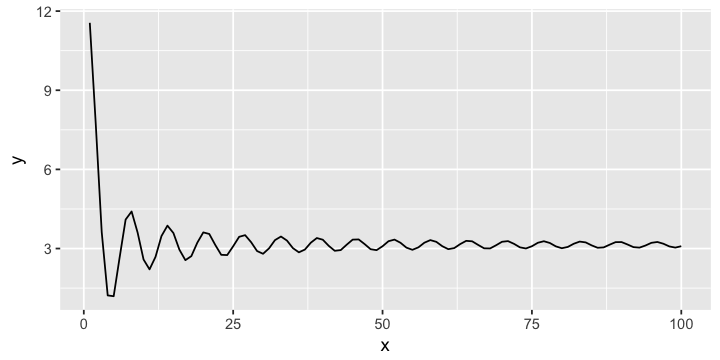

In [115]:
n = 100
x = 1:n
g = function(x) 10*x^(-99/100) * sin(x) + pi

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) 

Мы видим замечательную штуку. Последовательность сходится! Причём к числу $\pi$. Если мы зафиусируем произвольное число $\varepsilon$, например $1$, мы увидим, что начиная с $N$ примерно равного $10$ все члены последовательности оказываются зажаты в карсной окрестности. 

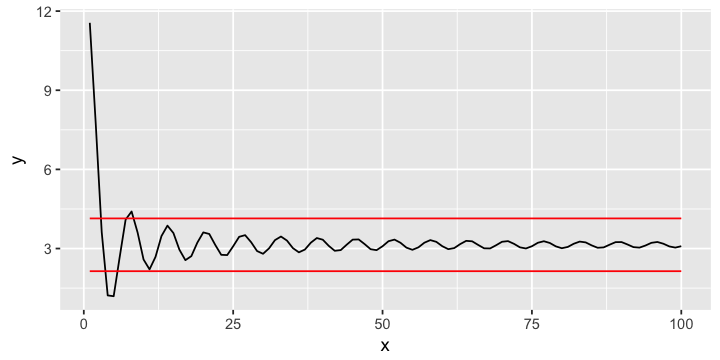

In [126]:
eps1 = 1

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, pi+eps1), col='red')+
  geom_line(aes(x, pi-eps1), col='red')

Если взять $\varepsilon$ немного поменьше, то ясное дело $N$ сдвинется вправо. Если мы для каждго $\varepsilon$ можем осуществить такой сдвиг вправо и начиная с этого сдвига все члены последовательности будут лежать в намеченом коридоре, то с последовательностью всё в полном порядке. 

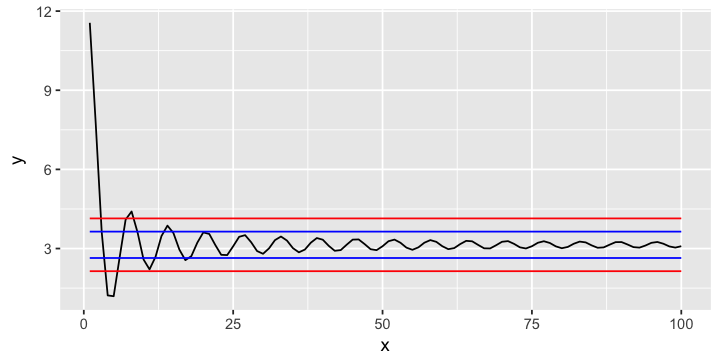

In [128]:
eps1 = 1
eps2 = 0.5

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, pi+eps1), col='red')+
  geom_line(aes(x, pi-eps1), col='red')+

  geom_line(aes(x, pi+eps2), col='blue')+
  geom_line(aes(x, pi-eps2), col='blue')

Если мы хотим взять более мелкое значение $\varepsilon$, нам просто надо будет сдвинуться вправо. 

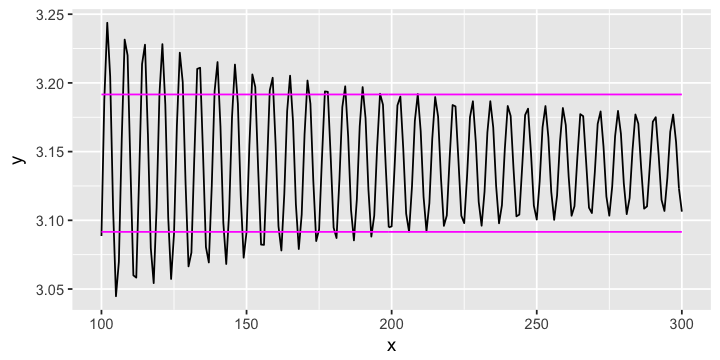

In [137]:
x = 100:300
eps3 = 0.05

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, pi+eps3), col='magenta')+
  geom_line(aes(x, pi-eps3), col='magenta')

Вот так обстоят дела с детерминированными последовательностями. В случае, когда речь идёт о последовательностях из случайных величин, всё оказывается немного сложнее. Давайте вспомним определение сходимости по вероятности. 

Говорят, что последовательность случайных величин $X_n$ сходится по вероятности к $X$ при $n \to \infty$, если

$$ 
P(\mid X_n - X \mid \ge \varepsilon) \to 0
$$

или если 

$$ 
P(\mid X_n - X \mid < \varepsilon) \to 1
$$


В случае сходимости по вероятности, когда мы оказываемся справа за некоторым номером $N(\varepsilon)$, последовательность может пробивать коридор. Но по мере нашего продвижения вправо, вероятность того, что она пробьёт коридор падает. 

Давайте попробуем посмотреть на это на конкретном примере. Предположим, что в наших руках оказалась генеральная совокупность из нормального распределения. Мы сделали из неё выборку некоторого объёма и посчитали по ней выборочное среднее. 

$$
\bar x = \sum_{i=1}^n x_i
$$

Из курса математической статистики мы знаем, что выборочное среднее сходится по вероятности к математическому ожиданию при росте $n$. Давайте посмотрим как это выглядит на практике. 

Зафиксируем какой-нибудь коридор, $\varepsilon$, за которым мы будем в дальнейшем наблюдать. Как можно увидеть, поначалу, при мальньком числе наблюдений, последовательность довольно часто пробивает коридор. Нет такого, чтобы она один раз погрузилась в него и никогда больше из него не выходила. 

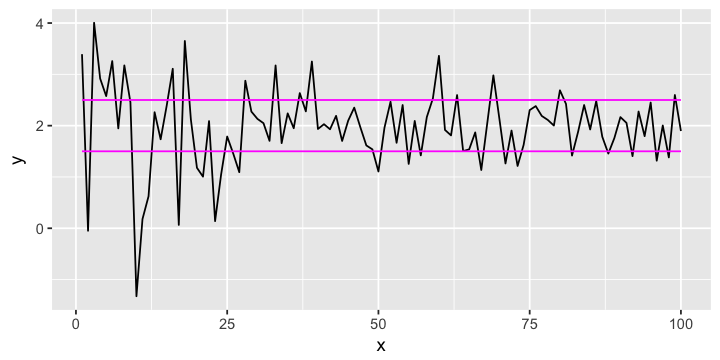

In [144]:
n = 1:100                  # выборка
s <- rep(0, times=100)     # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i] <- mean(x)
}

eps3 = 0.5

ggplot(data.frame('x'=n, 'y'=s)) + 
  geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Со временем, количество пробоин в зафиксированном коридоре падает, дисперсия становится все меньше и меньше, так как наша последовательность сходится к константе $2$. Последовательность всё ещё иногда пробивает коридор, но вероятность этого падает. 

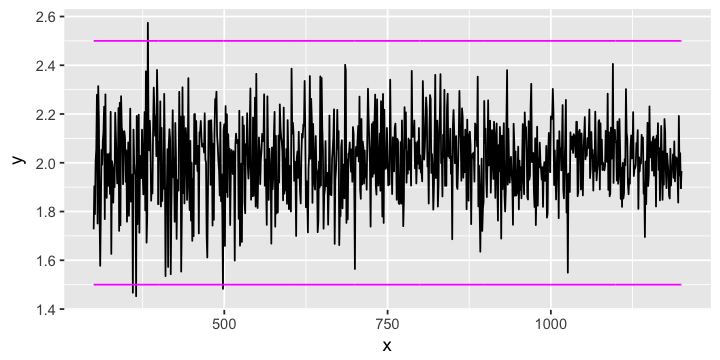

In [155]:
n = 300:1200                 # выборка
s <- rep(0, times=100)       # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i-299] <- mean(x)
}

eps3 = 0.5

ggplot(data.frame('x'=n, 'y'=s)) + 
  geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Если мы промотаем нашу последовательность при текущем коридоре глубоко вперёд, мы неожиданно для себя обнаружим, что она полностью оказалась внутри коридора. Обратите внимание, что это ни коем образом не означает, что последовательность этот коридор никогда больше не пробьёт. Она пробьёт его, правда вероятность этого стала значительно ниже. 

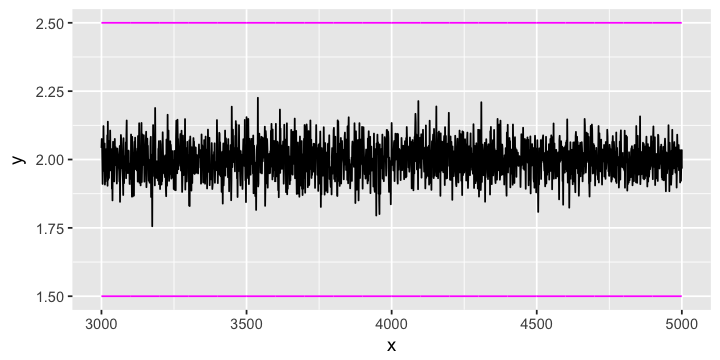

In [156]:
n = 3000:5000                # выборка
s <- rep(0, times=100)       # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i-2999] <- mean(x)
}

eps3 = 0.5

ggplot(data.frame('x'=n, 'y'=s)) + 
  geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Построим картинку на всём диапазоне.

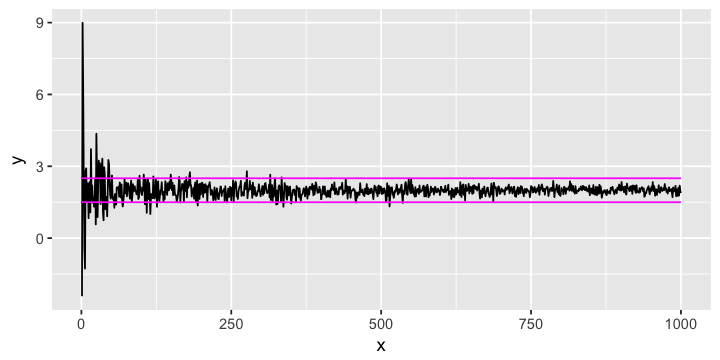

In [174]:
n = 1:1000                # выборка
s <- rep(0, times=100)       # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i] <- mean(x)
}

eps3 = 0.5

ggplot(data.frame('x'=n, 'y'=s)) + 
  geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого нам понадобится написать двойной цикл. 

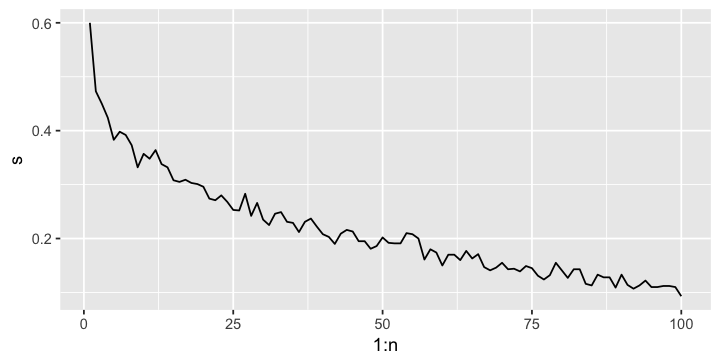

In [179]:
n = 100
s <- rep(0,times=n) # вектор из нулей 

for(i in 1:n){
    x <- rep(0,times=n)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i, mean=2, sd=4))
    }
    s[i] <- sum(abs(x) > 2+eps3)/1000
    }

qplot(1:n, s, geom='line')

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. Давайте попробуем зафиксировать несколько коридоров и посмотрим как будут вести себя вероятности. 

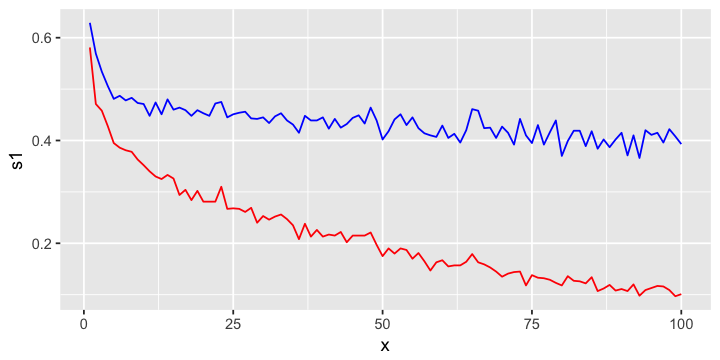

In [180]:
n = 100
s1 <- rep(0,times=n) # вектор из нулей 
s2 <- rep(0,times=n) # вектор из нулей 

for(i in 1:n){
    x <- rep(0,times=n)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i, mean=2, sd=4))
    }
    s1[i] <- sum(abs(x) > 2+0.5)/1000
    s2[i] <- sum(abs(x) > 2+0.1)/1000
    }

ggplot(data.frame('x'=1:n, 's1'=s1, 's2'=s2)) + 
  geom_line(aes(x, s1), col='red') +
  geom_line(aes(x, s2), col='blue')

Аналогичные графики можно было бы построить для дисперсии среднего. Мы же помним, что 

$$
Var(\bar X) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. 

Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие. Давайте вспомним такую замечательную штуку, как распределение Коши. Помните? У него не существует математического ожидания и для него выборочному среднему некуда сходиться. Давайте построим для него пару таких же рисунков. 

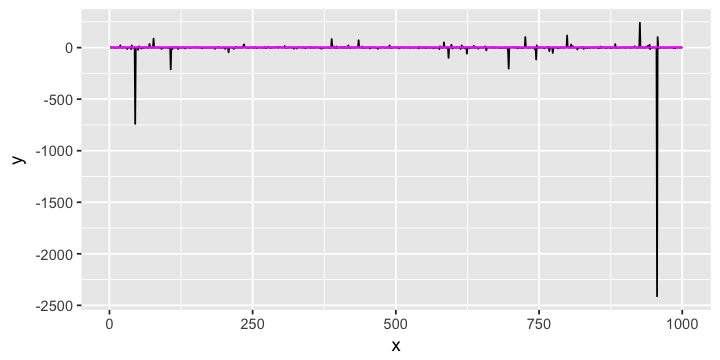

In [181]:
n = 1:1000                 # выборка
s <- rep(0, times=100)     # пустой вектор для средних 

for(i in n){
    x <- rcauchy(i)
    s[i] <- mean(x)
}

eps3 = 0.5

ggplot(data.frame('x'=n, 'y'=s)) + 
  geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Постоянные пробои в нашем коридоре. При этом во времени их количество никак не уменьшается. 

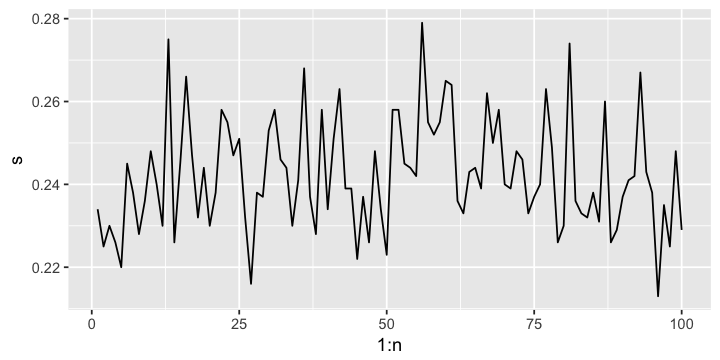

In [183]:
n = 100
s <- rep(0,times=n) # вектор из нулей 

for(i in 1:n){
    x <- rep(0,times=n)
    for(j in 1:1000){
        x[j] <- mean(rcauchy(i))
    }
    s[i] <- sum(abs(x) > 2+eps3)/1000
    }

qplot(1:n, s, geom='line')

Вероятность пробоя на всём промежутке ведёт себя абсолютно непредсказуемо. 

## 4. Сходимость в среднем



## 5. Сходимость почти-наверное

Последовательность случайных величин $X_n$ сходится почти новерное (a.s.) или с вероятностью единица, если при $n \to \infty$ 

Сходимость почти наверное (a.s.) 

## Почиташки 

* [Иллюстрация теоремы Гливенко-Кантели в R.](https://www.r-bloggers.com/convergence-and-asymptotic-results/) Можно посмотреть как в R построить красивые графики, на которых эмпирическая функция распределения почти наверное сходится к теоретической. На лекциях у вас была такая теорема без красивого названия и без доказательства. 
* [Хороший конспект по разновидностям сходимостей]( ) вместе с хорошей коллекцией задачек по ним. Рекомендую немного почитать об этом и попробовать решить задачки. 